In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing


In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("pima-data.csv")

In [4]:
df.shape

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [7]:
df.isnull().values.any()

False

In [8]:
del df ['skin']

In [9]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0 in Diabetes column


In [10]:
diabetes_map={True:1 , False:0}
df['diabetes']=df['diabetes'].map(diabetes_map)

In [11]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


True case and False case ratio


In [12]:
num_true=len(df.loc[df['diabetes']==True])
num_false=len(df.loc[df['diabetes']==False])
print('True case ratio = '+str(num_true)+' '+str('{:.2f}'.format(num_true/(num_true+num_false)*100)))
print('True case ratio = '+str(num_false)+' '+str('{:.2f}'.format(num_false/(num_true+num_false)*100)))

True case ratio = 268 34.90
True case ratio = 500 65.10


Splitting the data


70% for training and 30% for testing 

In [13]:
from sklearn.model_selection import train_test_split
feature_col_names=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names=['diabetes']
x=df[feature_col_names]
y=df[predicted_class_names]
split_test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=42)


In [14]:
print(str('{:.2f}'.format(len(x_train)/len(df.index)*100)),end=' in training set\n')
print(str('{:.2f}'.format(len(x_test)/len(df.index)*100)),end=' in testing set')

69.92 in training set
30.08 in testing set

In [15]:
print('Original True : {0} {1:0.2f}'.format(len(df.loc[df['diabetes']==1]),len(df.loc[df['diabetes']==1])/len(df.index)*100))
print('Original False : {0} {1:0.2f}'.format(len(df.loc[df['diabetes']==0]),len(df.loc[df['diabetes']==0])/len(df.index)*100))
print('Original True : {0} {1:0.2f}'.format(len(y_train.loc[y_train['diabetes']==1]),len(y_train.loc[y_train['diabetes']==1])/len(y_train.index)*100))
print('Original False : {0} {1:0.2f}'.format(len(y_train.loc[y_train['diabetes']==0]),len(y_train.loc[y_train['diabetes']==0])/len(y_train.index)*100))
print('Original True : {0} {1:0.2f}'.format(len(y_test.loc[y_test['diabetes']==1]),len(y_test.loc[y_test['diabetes']==1])/len(y_test.index)*100))
print('Original False : {0} {1:0.2f}'.format(len(y_test.loc[y_test['diabetes']==0]),len(y_test.loc[y_test['diabetes']==0])/len(y_test.index)*100))

Original True : 268 34.90
Original False : 500 65.10
Original True : 188 35.01
Original False : 349 64.99
Original True : 80 34.63
Original False : 151 65.37


In [16]:
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0,strategy='mean')
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)



Training with Naive Bayes


In [17]:
from sklearn.naive_bayes import GaussianNB
#creating naive bayes model and training it with data
nb_model=GaussianNB()
nb_model.fit(x_train , y_train.values.ravel())


GaussianNB()

Performance on Training Data


In [18]:
#predicting values for training data
nb_predict_train=nb_model.predict(x_train)
from sklearn import metrics

In [19]:
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train,nb_predict_train)))

Accuracy: 0.7542


In [20]:
nb_predict_test=nb_model.predict(x_test)
from sklearn import metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy: 0.7359


In [22]:
print('Confusion matrix')
print('{}'.format(metrics.confusion_matrix(y_test,nb_predict_test)))
print()
print('Classification Report')
print(metrics.classification_report(y_test,nb_predict_test))

Confusion matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train.values.ravel())

RandomForestClassifier(random_state=42)

Predict Training data


In [27]:
rf_predict_train=rf_model.predict(x_train)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train,rf_predict_train)))

Accuracy: 1.0000


In [28]:
rf_predict_test=rf_model.predict(x_test)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test,rf_predict_test)))

Accuracy: 0.7403


In [29]:
print('Confusion matrix')
print('{}'.format(metrics.confusion_matrix(y_test,rf_predict_test)))
print()
print('Classification Report')
print(metrics.classification_report(y_test,rf_predict_test))

Confusion matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(C=0.7,random_state=42)
lr_model.fit(x_train,y_train.values.ravel())
lr_predict_test=lr_model.predict(x_test)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test,lr_predict_test)))

Accuracy: 0.7489


C:\Users\ashut\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print('Confusion matrix')
print('{}'.format(metrics.confusion_matrix(y_test,lr_predict_test)))
print()
print('Classification Report')
print(metrics.classification_report(y_test,lr_predict_test))

Confusion matrix
[[125  26]
 [ 32  48]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



1st max value of 0.613 occured at C=1.400


Text(0, 0.5, 'recall score')

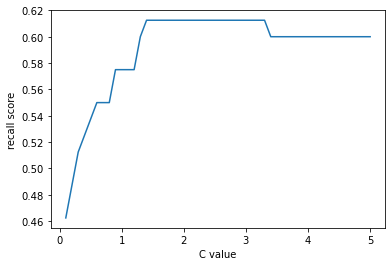

In [41]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(x_train, y_train.values.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")


In [43]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(x_train, y_train.values.ravel())
lr_predict_test = lr_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7056
[[108  43]
 [ 25  55]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231

0.6875


In [46]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  
# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(x_train, y_train.values.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=42, refit=False)

#### Predict on test data

In [48]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7013
[[109  42]
 [ 27  53]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



## Using our Trained Model to Predict Diabetes

In [51]:
import joblib
joblib.dump(lr_cv_model, "./pima-trained-model.pkl")

['./pima-trained-model.pkl']

In [52]:
lr_cv_model = joblib.load("./pima-trained-model.pkl")

In [53]:
df_predict = pd.read_csv("./pima-additional-data.csv")
print(df_predict.shape)

(4, 10)


###### Cleaning data

In [54]:
del df_predict['skin']
df_predict

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,False
1,2,197,70,45,543,30.5,0.158,53,True
2,7,100,0,0,0,30.0,0.484,32,True
3,1,103,30,38,83,43.3,0.183,33,False


In [55]:
X_predict = df_predict
del X_predict['diabetes']

In [56]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_predict = fill_0.fit_transform(X_predict)

##### Predicting Diabetes ,  1 for Diabetes_positive and 0 for diabetes_negative


In [57]:
lr_cv_model.predict(X_predict)

array([0, 1, 0, 0], dtype=int64)